In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image
import os
import pickle
import random
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import  img_to_array, load_img
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.optimizers import Adam

In [2]:
Dataset="data"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['Mask', 'No Mask']


In [3]:
images=[]
labels=[]
img_size=128
num_classes=2
batch_size=32
epoch=30

In [4]:
for category in Data_Dir:
    folder_path=os.path.join(Dataset,category)
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        
        try:
            #concerting image to grayscale
#             grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            
            #resizing the gray scaled images into 56x56 to keep size of the image consistent
            resized_img=cv2.resize(img,(img_size,img_size))
            images.append(resized_img)
            labels.append(category)
        except Exception as e:
            print('Exception: ',e)

In [5]:
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_size,img_size,3))

In [6]:
#perform one hot encoding 

lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)

(train_X, test_X, train_y, test_y)=train_test_split(images,labels,test_size=0.2,random_state=0)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1318, 128, 128, 3) (330, 128, 128, 3) (1318, 2) (330, 2)


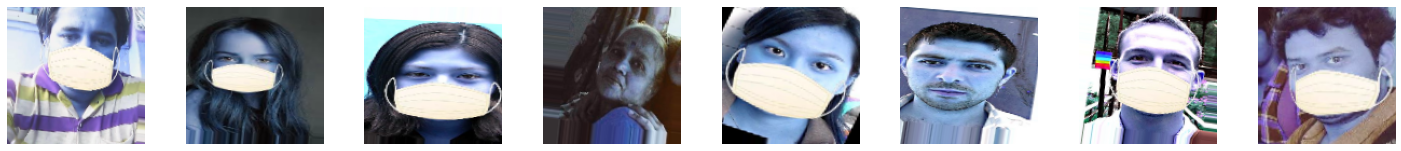

In [7]:
dataGen = ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            zoom_range = 0.2,
                            shear_range = 0.1,
                            rotation_range = 10)
dataGen.fit(train_X)
batches = dataGen.flow(train_X, train_y, batch_size = 32)
X_batch, y_batch = next(batches)

fig,axs = plt.subplots(1,8,figsize = (20,5))
fig.tight_layout()

for i in range(8):
    axs[i].imshow(X_batch[i].reshape(img_size,img_size,3))
    axs[i].axis('off')
plt.show()

# train_y = to_categorical(train_y, num_classes)
# test_y = to_categorical(test_y, num_classes)

In [8]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image

In [9]:
IMAGE_SIZE = [128, 128, 3]

inception = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

for layer in inception.layers:
  layer.trainable = False

In [10]:
x = Flatten()(inception.output)
prediction = Dense(2, activation='sigmoid')(x)

model = Model(inputs=inception.input, outputs=prediction)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 13, 13, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 13, 13, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 13, 13, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 13, 13, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 13, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 13, 13, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 13, 13, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 13, 13, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 6, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 6, 6, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 6, 6, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 6, 6, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 6, 6, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 6, 6, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 6, 6, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 6, 6, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 6, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 6, 6, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 6, 6, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 6, 6, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 6, 6, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 2, 2, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 2, 2, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 2, 2, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 2, 2, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 2, 2, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 2, 2, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])

In [12]:
history=model.fit(
    train_X,
    train_y,
    epochs=epoch,
    validation_split=0.2)

model.save('InceptionV3.h5')

Epoch 1/30
33/33 [==============================] - 10s 81ms/step - loss: 0.6347 - accuracy: 0.8776 - val_loss: 0.0493 - val_accuracy: 0.9811
Epoch 2/30
33/33 [==============================] - 1s 26ms/step - loss: 0.0758 - accuracy: 0.9801 - val_loss: 0.1027 - val_accuracy: 0.9583
Epoch 3/30
33/33 [==============================] - 1s 26ms/step - loss: 0.0353 - accuracy: 0.9877 - val_loss: 0.0323 - val_accuracy: 0.9886
Epoch 4/30
33/33 [==============================] - 1s 25ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0249 - val_accuracy: 0.9886
Epoch 5/30
33/33 [==============================] - 1s 25ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.0161 - val_accuracy: 0.9886
Epoch 6/30
33/33 [==============================] - 1s 26ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9924
Epoch 7/30
33/33 [==============================] - 1s 26ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9962
Epoch 8/30
3

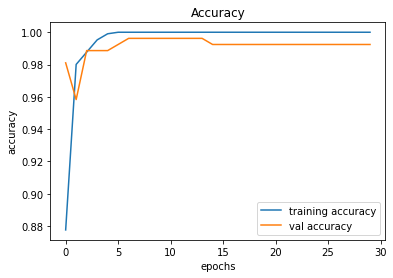

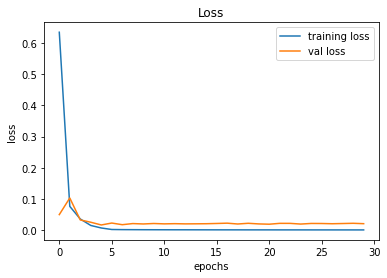

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
score = model.evaluate(train_X, train_y, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.9984825253486633


In [15]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9818181991577148


In [16]:
pred = model.predict(test_X)

11/11 [==============================] - 1s 17ms/step


In [17]:
y_pred=[]

In [18]:
for i in range (len(pred)):
  y_pred.append(np.argmax(pred[i],axis=0))

In [19]:
y_pred

[1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(np.where(test_y == 1)[1], y_pred))

0.9818181818181818


In [22]:
Data_Dir

['Mask', 'No Mask']

In [ ]:
from sklearn.metrics import classification_report
cf = classification_report(np.where(test_y == 1)[1], y_pred, target_names = Data_Dir)
print(cf)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.where(test_y == 1)[1], y_pred)

In [23]:
cm_df = pd.DataFrame(cm, index = Data_Dir,
                     columns = Data_Dir
                    )

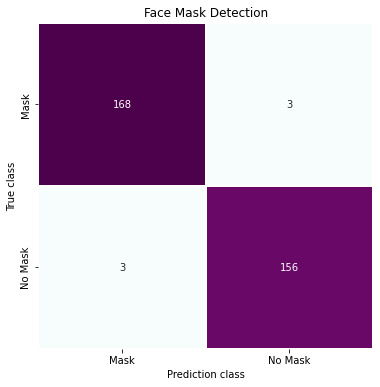

In [24]:
plt.figure(figsize = (6,6))
sns.heatmap(cm_df, annot = True,cmap='BuPu',cbar=False,linewidth=2,fmt='d')
plt.title('Face Mask Detection')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()